In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
data = pd.read_csv('data/data2.txt', sep=" ", header=None)

This is the function we need to compare
$$\rho_{cal}(x,t) = \rho_0 \left(1 - \text{erf} \frac{x}{2 \sqrt{D t}} \right)$$

Note that the Gaussian error function can be approximate:
\begin{aligned}\operatorname {erf} z&={\frac {2}{\sqrt {\pi }}}\sum _{n=0}^{\infty }{\frac {(-1)^{n}z^{2n+1}}{n!(2n+1)}}\\[6pt]&={\frac {2}{\sqrt {\pi }}}\left(z-{\frac {z^{3}}{3}}+{\frac {z^{5}}{10}}-{\frac {z^{7}}{42}}+{\frac {z^{9}}{216}}-\cdots \right)\end{aligned}

We can approximate our original function to:
$$\rho_{cal}(x,t) = \rho_0 \left[1 - {\frac {2}{\sqrt {\pi }}}\left(\frac{x}{2 \sqrt{D t}}-{\frac {x^{3}}{6(D t)^{3/2}}}+\cdots \right) \right]$$

We need to formulate our problem in a linear form $y = Ap$, where $A = [[x \; 1]]$ and $p = [[m], [c]]$.  

Let us take only the first term of the expansion and simplify:
$$\rho_{cal} = - x \frac{\rho_0}{\sqrt {\pi D t}} +\rho_0 $$
Therefore:
\begin{gather}
y =  \rho_{cal}(x,t) \\
m =   - \frac{\rho_0}{\sqrt {\pi D t}} \\
c = \rho_0
\end{gather}
Which gives us $D = \frac{\rho_0^2}{\pi m^2 t}$

In [6]:
# idependent 
X = data[0].values

#dependent variables, here we can choose if we wanna test for 3 or 6 months.
Y = data[1].values 
# Y = data[2].values

print(Y)

[2.48 0.52 0.44 0.35 0.22 0.18 0.1  0.08 0.06]


For the sake of convinence, let us make a function to expand the gaussian error function, just in case someone wants to check it. So our $A$ matrix would be something like:
$$A = [[x \; x^3 \; x^5 \cdots  1]]$$

In [7]:
def A_erf_pol_exp(X, num_ex):
    A = []
    for i in range(num_ex):
        A.append(X**(2*i+1))
    A.append(np.ones(len(X)))
    return np.vstack(A).T

num_terms = 1
A = A_erf_pol_exp(X, num_terms)
print(A)

[[ 1.  1.]
 [ 3.  1.]
 [ 5.  1.]
 [ 7.  1.]
 [ 9.  1.]
 [11.  1.]
 [13.  1.]
 [15.  1.]
 [17.  1.]]


In [8]:
Y1 = Y1[:, np.newaxis]
Y2 = Y2[:, np.newaxis]
print(Y1)
print(Y2)
Y = Y[:, np.newaxis]

[[2.48]
 [0.52]
 [0.44]
 [0.35]
 [0.22]
 [0.18]
 [0.1 ]
 [0.08]
 [0.06]]
[[2.99]
 [2.64]
 [2.98]
 [2.7 ]
 [1.92]
 [1.41]
 [1.14]
 [0.6 ]
 [0.33]]


In [11]:
p  = (np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),Y))

D = p[1]/(np.pi*(p[0]**2)*3)
print(D)

[15.0258693]


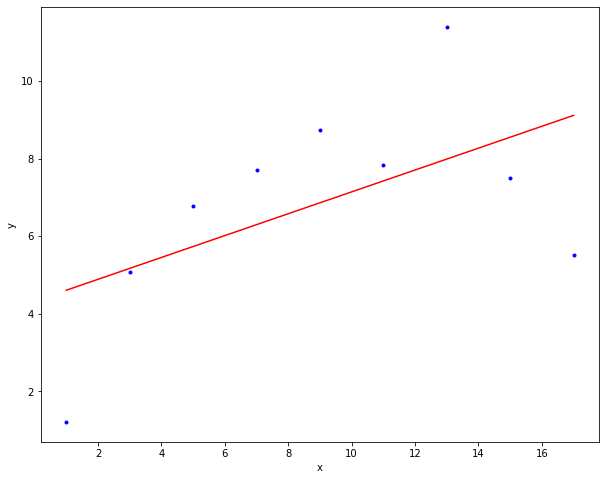

In [20]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(X, Y, 'b.')
plt.plot(X, np.dot(A,p), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Actually, there is a numpy function that does everythig, but this should be didatic, right?

In [ ]:
p = np.linalg.lstsq(A, Y, rcond=None)[0]
print(p)